# Imports

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import numpy as np
from matplotlib import pyplot as plt
from functools import partial
from scipy.optimize import fmin
import torch
import os, glob

from indentation.indentationset import IndentationSet
from indentation.processing.find_contact import findContact_minimum, findContact_blackMagic, findContact_blackMagic_CNN
from indentation.processing.signal import do_nothing, crop_start, crop_afm_temp
from indentation.processing.calculate_parameters import parameter_youngs_modulus
from indentation.processing.plotting import plot_curve_parameters_bar, plot_instance_parameters_bar, plot_mean_force_curves
from indentation.ml.models import ConvClassifier_1, ConvClassifier_2

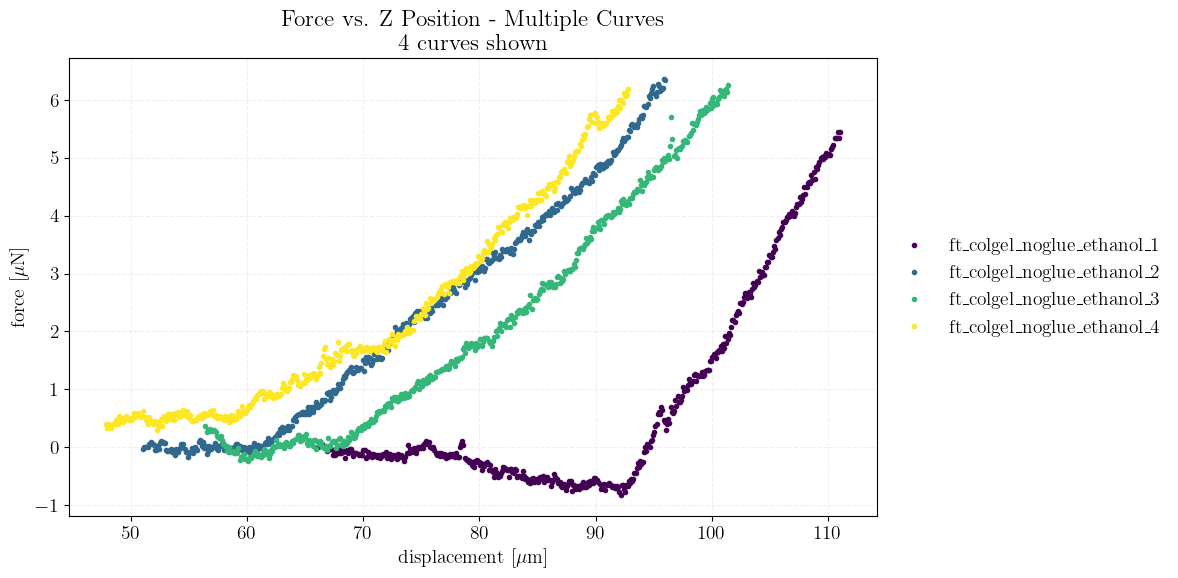

[{'raw': {'force': array([ 1.20900e-02,  6.22200e-02,  2.61900e-02, -1.92400e-02,
       -5.68300e-02, -5.21300e-02,  1.52300e-02, -2.70700e-02,
       -3.49000e-02, -1.32020e-01, -9.91200e-02, -1.36710e-01,
       -3.17700e-02, -5.52600e-02, -9.91200e-02, -1.03820e-01,
       -2.70700e-02, -9.75600e-02, -7.71900e-02, -6.46600e-02,
       -1.91540e-01, -5.52600e-02, -4.58600e-02, -1.02250e-01,
       -3.17700e-02, -2.39300e-02, -8.18900e-02, -1.46110e-01,
       -9.75600e-02, -9.59900e-02, -1.00690e-01, -1.10090e-01,
       -1.28880e-01, -1.16350e-01, -1.35150e-01, -1.35150e-01,
       -5.37000e-02, -4.27300e-02, -1.79010e-01, -1.69610e-01,
       -7.71900e-02, -1.00690e-01, -1.35150e-01, -1.75870e-01,
       -1.13220e-01, -1.33580e-01, -1.36710e-01, -1.25750e-01,
       -1.63340e-01, -1.27320e-01, -1.77440e-01, -1.36710e-01,
       -1.44550e-01, -1.08520e-01, -1.10090e-01, -8.50200e-02,
       -1.83710e-01, -1.16350e-01, -1.52380e-01, -1.19480e-01,
       -2.05640e-01, -1.42980e-01, -

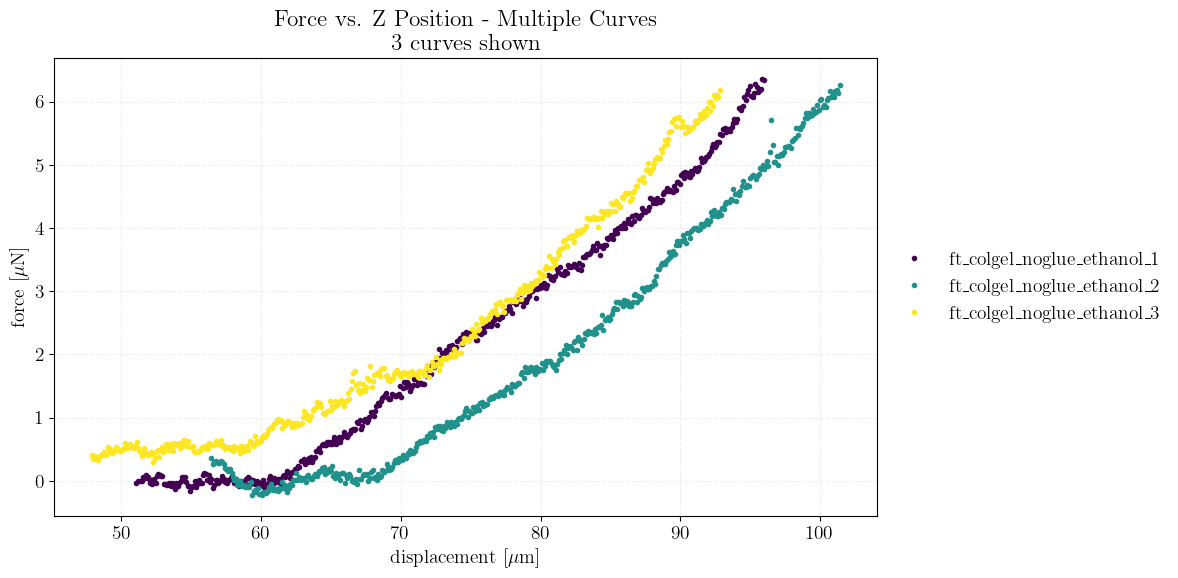

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Force vs. Z Position - Multiple Curves\n3 curves shown'}, xlabel='displacement [$\\mu$m]', ylabel='force [$\\mu$N]'>)

In [22]:
# in air
#path =  r"G:\File_Exchange\Raoul_Paula\2024_12_06\ft_colgel_noglue1\ft_colgel_noglue_1"

# in ethanol
path = r"G:\File_Exchange\Raoul_Paula\2024_12_06\ft_colgel_noglue1\ft_colgel_noglue_ethanol.dat"
ft = IndentationSet(path, exp_type="ft")

ft.plot_all_raw(linestyle="")

ft.delete_curves([0])
ft.plot_all(linestyle="")
ft.restore_all()
ft.plot_all(linestyle="")




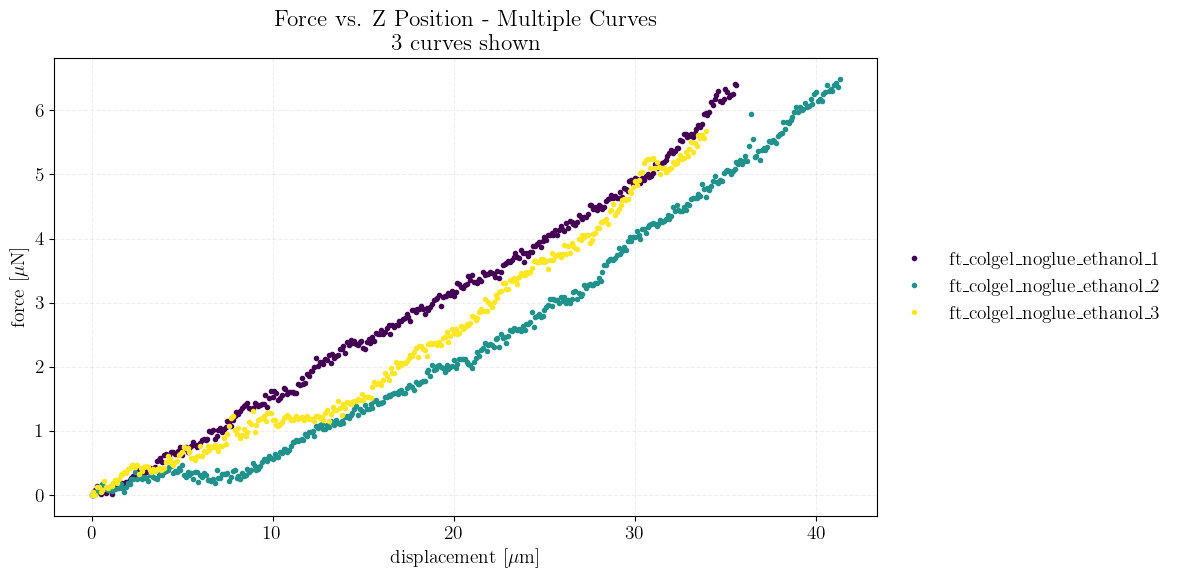

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Force vs. Z Position - Multiple Curves\n3 curves shown'}, xlabel='displacement [$\\mu$m]', ylabel='force [$\\mu$N]'>)

In [20]:
processing_pl = [findContact_blackMagic]

ft.process_raw(processing_pl)
ft.plot_all(linestyle="")

Mean and std: 1.768182693742834 0.9070542762202104


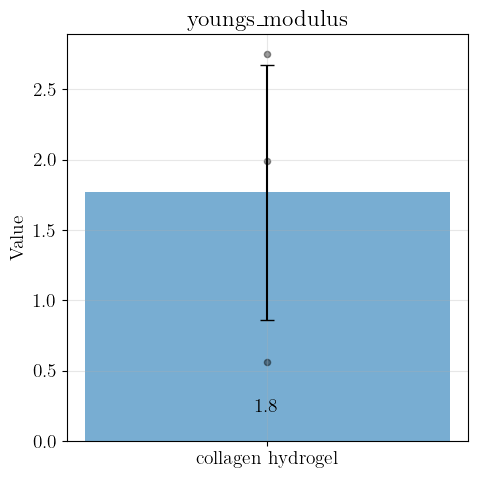

In [21]:
function_arguments = dict(radius=100, nu=0.5, cutoff=10, keyname="youngs_modulus")
ft.calculate_curve_parameter(function=parameter_youngs_modulus, **function_arguments)
plot_curve_parameters_bar(ft, 
                          parameter_names=['youngs_modulus'],
                          labels=['collagen hydrogel'],
                          figsize=(5,5))